In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [100]:
cd '/content/drive/My Drive/CSCE_689/'

/content/drive/My Drive/CSCE_689


In [0]:
# Load input files from  
import numpy as np
import pandas as pd
labels=pd.read_csv('Labels_final.csv',header=None)
features=pd.read_csv('Features_final.csv',header=None)

In [5]:
features.shape

(4957, 5)

In [0]:

df_features=pd.DataFrame.from_records(features)
df_features["Y"]=labels.loc[:,2]

In [7]:
df_features['label']=labels.iloc[:,0]
df_features.head()

,0,1,2,3,4,Y,label
0,0.216,0.460,0.383,2.13,1.20,0,0
1,0.134,0.401,0.236,2.99,1.22,0,0
2,0.132,0.431,0.267,3.27,1.24,0,0
3,0.230,0.680,0.406,2.95,1.14,0,0
4,0.195,0.303,0.381,1.56,1.23,0,0


In [0]:
feature_mean=df_features[df_features['Y']==0].groupby('label').mean()
feature_std=df_features[df_features['Y']==0].groupby('label').std()

In [0]:
## Normalize the dataframe with mean and standard deviation and add to the input feature
df_normalised=df_features.apply(lambda x: (x[0:5]-feature_mean.loc[x['label']])/feature_std.loc[x['label']],axis=1)
# df_normalised.head()

In [10]:
df=pd.merge(df_normalised,df_features,left_index=True,right_index=True)
# df=df_features
df.head()

,0_x,1_x,2_x,3_x,4_x,Y_x,0_y,1_y,2_y,3_y,4_y,Y_y,label
0,0.958314,-0.626852,0.773877,-0.614034,0.330169,NaN,0.216,0.460,0.383,2.13,1.20,0,0
1,-0.213892,-1.087716,-1.241803,-0.455127,0.752786,NaN,0.134,0.401,0.236,2.99,1.22,0,0
2,-0.242482,-0.853378,-0.816727,-0.403389,1.175402,NaN,0.132,0.431,0.267,3.27,1.24,0,0
3,1.158446,1.091621,1.089256,-0.462518,-0.937680,NaN,0.230,0.680,0.406,2.95,1.14,0,0
4,0.658115,-1.853218,0.746453,-0.719356,0.964094,NaN,0.195,0.303,0.381,1.56,1.23,0,0


In [0]:
df['label']=labels.loc[:,2]
df['timestamp']=labels.iloc[:,1]
df['video_label']=labels.iloc[:,0]
df=df.drop(['Y_y', 'Y_x'],axis=1) # 8 inputs
df=df[:-1]

In [0]:
## Train-validation split
train_percentage = 20/24
train_index = int(len(df)*train_percentage)
test_index = len(df)-train_index

In [13]:
df.to_numpy().reshape(int(df.shape[0]/2),2,13)
# df[:-1].shape

array([[[ 0.95831376, -0.62685238,  0.7738771 , ...,  0.        ,
          0.        ,  0.        ],
        [-0.21389177, -1.08771581, -1.24180279, ...,  0.        ,
          0.5       ,  0.        ]],

       [[-0.24248215, -0.85337848, -0.81672744, ...,  0.        ,
          1.        ,  0.        ],
        [ 1.15844641,  1.09162144,  1.08925558, ...,  0.        ,
          1.5       ,  0.        ]],

       [[ 0.65811478, -1.85321779,  0.74645288, ...,  0.        ,
          3.        ,  0.        ],
        [ 0.44368694,  1.35720375,  0.4310744 , ...,  0.        ,
          3.5       ,  0.        ]],

       ...,

       [[ 0.47634188, -0.52269359,  0.56161499, ...,  0.        ,
         79.5       , 58.        ],
        [ 0.19063381, -0.11886916,  0.24204491, ...,  0.        ,
         80.        , 58.        ]],

       [[-0.14269227, -0.46500439, -0.11920822, ...,  0.        ,
         80.5       , 58.        ],
        [ 0.63506858, -0.69576121,  0.95065683, ...,  0.     

In [0]:
df_train = df[:train_index]
df_test = df[-test_index:]

In [0]:
x_test = df_test.drop(["label","timestamp","video_label"],axis=1)
y_test = df_test["label"]
test_timestamp=df_test["timestamp"]
test_video_label=df_test["video_label"]

In [16]:
x_train = df_train.drop(['label',"timestamp","video_label"],axis=1)
y_train = df_train['label']
train_timestamp=df_train["timestamp"]
train_video_label=df_train["video_label"]
np.where(np.asanyarray(np.isnan(x_train)))


(array([], dtype=int64), array([], dtype=int64))

In [17]:
x_train.shape

(4130, 10)

In [18]:

x_test.shape

(826, 10)

In [0]:
import numpy as np
x_shaped_train  = np.array(x_train).reshape(int(x_train.shape[0]/2),2,10)
x_shaped_test  = np.array(x_test).reshape(int(x_test.shape[0]/2),2,10)

In [20]:
x_shaped_train.shape

(2065, 2, 10)

In [21]:
y_train = np.array(y_train).astype('float')
y_test = np.array(y_test).astype('float')
# y_test=y_test[:-1]
y_shaped_train  = []
for i in range(0, len(y_train), 2):
  y_shaped_train.append(y_train[i])
print(len(y_shaped_train))

y_shaped_test  = []
for i in range(0, len(y_test), 2):
  y_shaped_test.append(y_test[i])
print(len(y_shaped_test))

2065
413


In [22]:
y_shaped_train = np.array(y_shaped_train)
y_shaped_train.shape

(2065,)

In [23]:
y_shaped_test = np.array(y_shaped_test)
y_shaped_test.shape

(413,)

In [24]:
x_shaped_test.shape

(413, 2, 10)

In [0]:
# %tensorflow_version 1.14.
import numpy as np
# from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Dropout, Bidirectional, LSTM
# from tensorflow.keras.layers.recurrent import LSTM
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.python.keras.layers.wrappers import TimeDistributed
# from tensorflow.keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    # MaxPooling2D)
from collections import deque
import sys
from tensorflow.keras.utils import plot_model
import keras
from IPython.display import clear_output
from tensorflow.keras import losses
from tensorflow.keras.callbacks import LearningRateScheduler

import tensorflow.keras.backend as K
from keras_self_attention import SeqSelfAttention
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import numpy
# import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping


In [0]:
# then we can go ahead and set the parameter space
p = {'first_neuron':[128,256,512],
     'batch_size': [64,128,256],
     'dropout': [0.4,0.5,0.6],
     'kernel_initializer': ['uniform','normal'],
     'learning_rate':[0.0001,0.00001,0.000001,0.0000001],
     'class weight':[1,1.5,2,2.5,3,3.5,4,4.5,5,5.5]}

In [0]:
## Define Model
def create_model(x_train, y_train, x_val, y_val, params):
  model = Sequential()
  model.add(Dense(int(params['first_neuron']), activation='sigmoid',kernel_initializer=params['kernel_initializer'],input_shape=(2,10)))
  model.add(Bidirectional(LSTM(int(params['first_neuron']/2), return_sequences=True,input_shape=(2,10,),dropout=params['dropout'])))
  # model.add(SeqSelfAttention(attention_activation='sigmoid'))

  model.add(Flatten())
  model.add(Dense(int(params['first_neuron']/4), activation='relu',kernel_initializer=params['kernel_initializer'])) #FC2
  model.add(Dropout(params['dropout']))
  model.add(Dense(int(params['first_neuron']/16), activation='tanh',kernel_initializer=params['kernel_initializer']))#FC3
  model.add(Dropout(params['dropout']))
  model.add(Dense(1, activation='sigmoid'))#Output Layer
  optimizer = Adam(lr=params['learning_rate'])
  metrics = ['accuracy']
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)
  history=model.fit(x_train, y_train,epochs=250, batch_size=params['batch_size'], validation_data = (x_val,y_val),class_weight={0:1,1:params['class weight']},
             callbacks=[talos.utils.ExperimentLogCallback('best_model', params)],verbose=0)
  return history, model



In [77]:
## Hyperparameter scanning
t = talos.Scan(x=x_shaped_train,
               y=y_shaped_train,
               model=create_model,
               params=p,
               experiment_name='best_model',
               round_limit=10)





  0%|          | 0/10 [00:00<?, ?it/s]



 10%|█         | 1/10 [02:09<19:26, 129.64s/it]



 20%|██        | 2/10 [08:39<27:42, 207.77s/it]



 30%|███       | 3/10 [10:07<20:02, 171.77s/it]



 40%|████      | 4/10 [16:35<23:39, 236.61s/it]



 50%|█████     | 5/10 [23:05<23:33, 282.63s/it]



 60%|██████    | 6/10 [34:35<26:59, 404.87s/it]



 70%|███████   | 7/10 [36:02<15:28, 309.64s/it]



 80%|████████  | 8/10 [37:20<08:00, 240.11s/it]



 90%|█████████ | 9/10 [40:42<03:48, 228.44s/it]



100%|██████████| 10/10 [45:26<00:00, 272.65s/it]


In [0]:
# use Scan object as input
analyze_object = talos.Analyze(t)

In [79]:
# access the dataframe with the results
analyze_object.data

,round_epochs,loss,acc,val_loss,val_acc,batch_size,class weight,dropout,first_neuron,kernel_initializer,learning_rate
0,350,0.696769,0.771626,0.547397,0.777419,64,1.5,0.5,128,uniform,1.000000e-05
1,350,0.709862,0.755017,0.544339,0.777419,256,1.5,0.6,512,normal,1.000000e-06
2,350,0.837723,0.766090,0.659991,0.777419,128,2.0,0.5,128,uniform,1.000000e-06
3,350,1.375126,0.441522,0.741254,0.222581,256,5.0,0.6,512,normal,1.000000e-07
4,350,0.758438,0.613841,0.669129,0.777419,256,1.5,0.4,512,normal,1.000000e-07
5,350,0.543596,0.771626,0.528957,0.777419,64,1.0,0.4,512,normal,1.000000e-06
6,350,1.161627,0.352941,0.709188,0.222581,128,4.0,0.5,128,normal,1.000000e-06
7,350,0.643634,0.746021,0.633069,0.777419,256,1.0,0.5,128,normal,1.000000e-06
8,350,0.687964,0.771626,0.558447,0.777419,128,1.5,0.4,256,uniform,1.000000e-06
9,350,0.651413,0.783391,0.518019,0.780645,64,1.5,0.6,256,uniform,1.000000e-04


In [80]:
# get the highest result for any metric
analyze_object.high('val_acc')

0.7806451320648193

Matplotlib Runtime Error. Plots will not work.


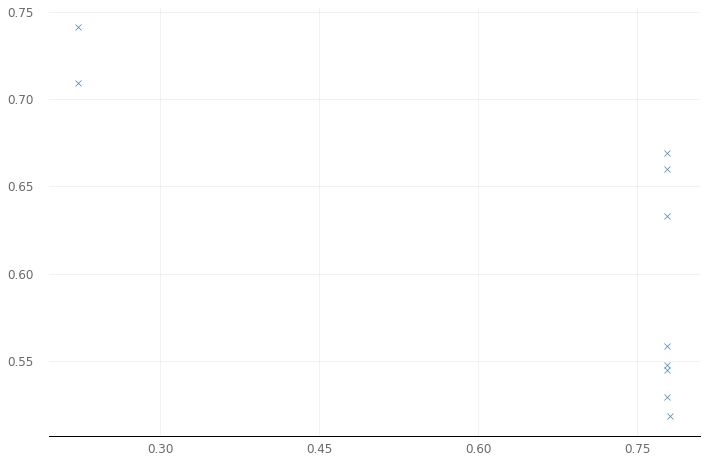

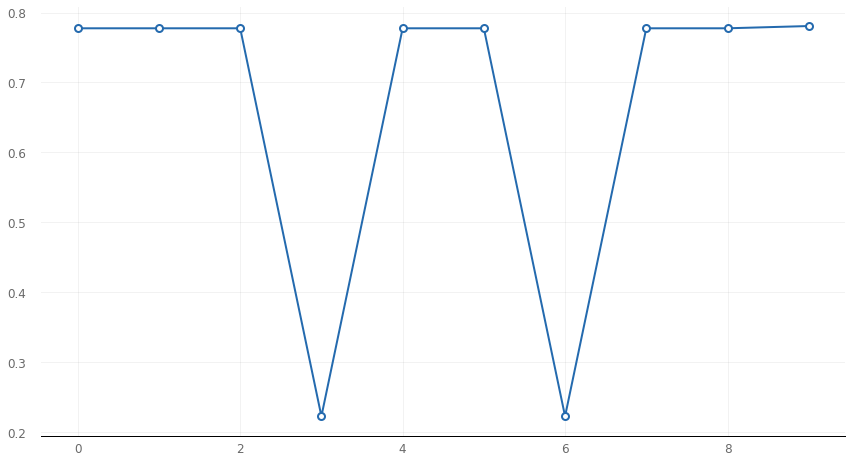

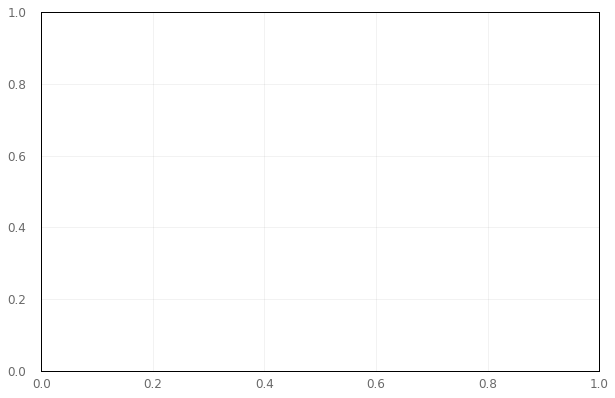

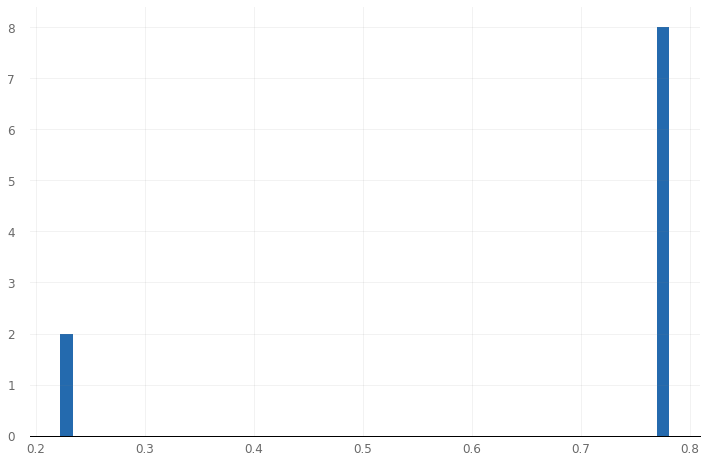

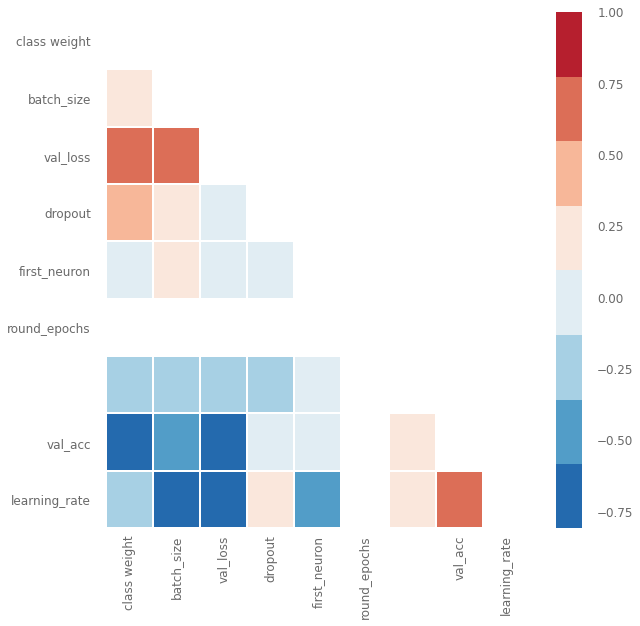

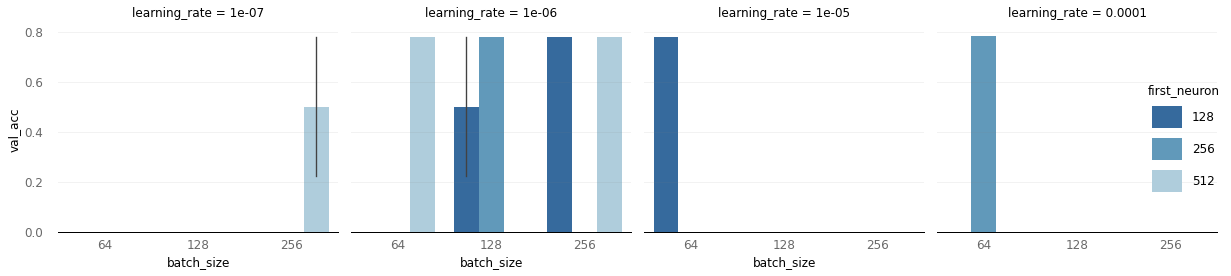

In [81]:
# a regression plot for two dimensions 
analyze_object.plot_regs('val_acc', 'val_loss')

# line plot
analyze_object.plot_line('val_acc')

# up to two dimensional kernel density estimator
analyze_object.plot_kde('val_acc')

# a simple histogram
analyze_object.plot_hist('val_acc', bins=50)

# heatmap correlation
analyze_object.plot_corr('val_loss', ['acc', 'loss', 'val_loss'])

# a four dimensional bar grid
analyze_object.plot_bars('batch_size', 'val_acc', 'first_neuron', 'learning_rate')

In [82]:
# get the name of the experiment log (Last .csv file)
!ls -lhtr best_model

total 370K
-rw------- 1 root root    0 Mar 31 17:08 033120170841.csv
-rw------- 1 root root 1021 Mar 31 17:24 033120170922.csv
-rw------- 1 root root 196K Mar 31 18:17 033120170922.log
-rw------- 1 root root 172K Mar 31 19:20 033120183507.log
-rw------- 1 root root 1020 Mar 31 19:20 033120183507.csv


In [0]:
from talos.utils.recover_best_model import recover_best_model

results, models = recover_best_model(x_train=x_shaped_train,
                                     y_train=y_shaped_train.reshape(-1,1),
                                     x_val=x_shaped_test,
                                     y_val=y_shaped_test.reshape(-1,1),
                                     experiment_log='best_model/033120183507.csv', ## Use the name obtained from above
                                     input_model=create_model,
                                     n_models=5,
                                     task='multi_label')

In [179]:
## Top performing models
results

,round_epochs,loss,acc,val_loss,val_acc,batch_size,class weight,dropout,first_neuron,kernel_initializer,learning_rate,crossval_mean_f1score
9,350,0.651413,0.783391,0.518019,0.780645,64,1.5,0.6,256,uniform,1.000000e-04,1.0
0,350,0.696769,0.771626,0.547397,0.777419,64,1.5,0.5,128,uniform,1.000000e-05,1.0
1,350,0.709862,0.755017,0.544339,0.777419,256,1.5,0.6,512,normal,1.000000e-06,1.0
2,350,0.837723,0.766090,0.659991,0.777419,128,2.0,0.5,128,uniform,1.000000e-06,1.0
4,350,0.758438,0.613841,0.669129,0.777419,256,1.5,0.4,512,normal,1.000000e-07,1.0


In [0]:
## Best Model
model=models[0]

In [0]:
params=dict(results.iloc[0,:])
history,model=create_model(x_shaped_train,y_shaped_train,x_shaped_test,y_shaped_test,params)

In [187]:
params

{'acc': 0.783391,
 'batch_size': 64,
 'class weight': 1.5,
 'crossval_mean_f1score': 1.0,
 'dropout': 0.6,
 'first_neuron': 256,
 'kernel_initializer': 'uniform',
 'learning_rate': 0.0001,
 'loss': 0.6514127226849328,
 'round_epochs': 350,
 'val_acc': 0.78064513,
 'val_loss': 0.5180189448018228}

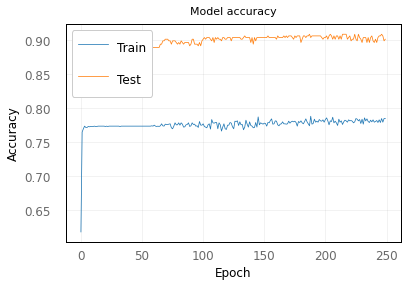

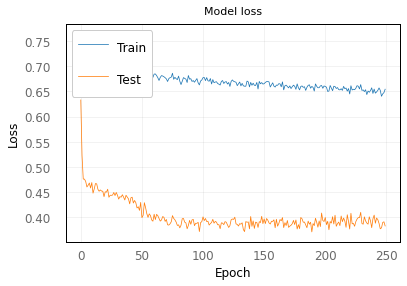

In [185]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [186]:
## Prediction, Accuracy, F1-score, ROC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

pred_rnn = model.predict_classes(x_shaped_test)
y_score_10 = model.predict_proba(x_shaped_test)
acc10 = accuracy_score(y_shaped_test, pred_rnn)
f1_score_10 = metrics.f1_score(y_shaped_test, np.array(pred_rnn),average='micro')
roc_10 = metrics.roc_auc_score(y_shaped_test, y_score_10)
print([acc10, f1_score_10, roc_10])
print(confusion_matrix(y_shaped_test, pred_rnn))

[0.9007263922518159, 0.9007263922518159, 0.7997867551238005]
[[357  10]
 [ 31  15]]


In [163]:
len(pred_rnn.astype('int'))

413

In [0]:
## Multiplying predicted labels into 2 to match for each timeframe
pred=np.array([pred_rnn[i//2] for i in range(len(pred_rnn)*2)]) 
pred_prob=np.array([y_score_10[i//2] for i in range(len(y_score_10)*2)]) 


In [0]:
## Plotting time-label graph for each of the validation videos
plot_df=pd.DataFrame()
plot_df["label"]=test_video_label
plot_df["time"]=test_timestamp
plot_df["pred"]=pred

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


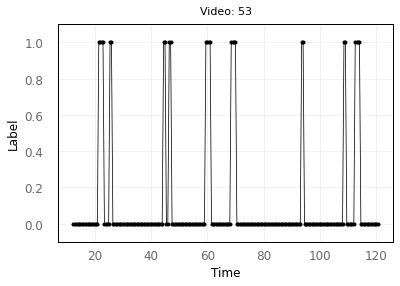

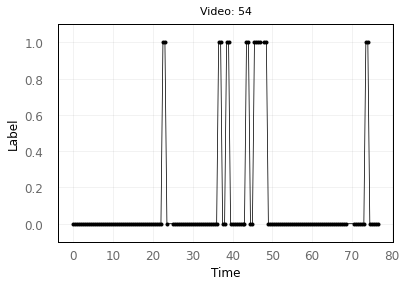

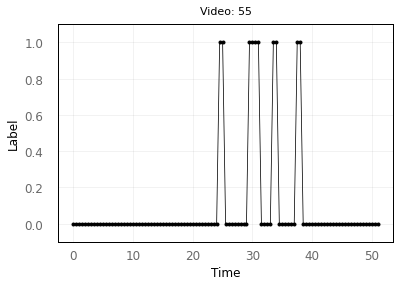

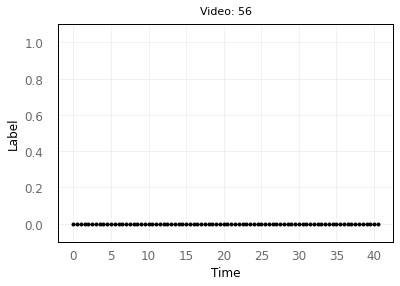

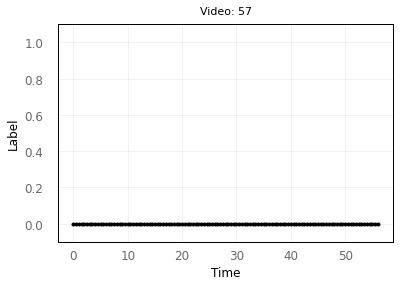

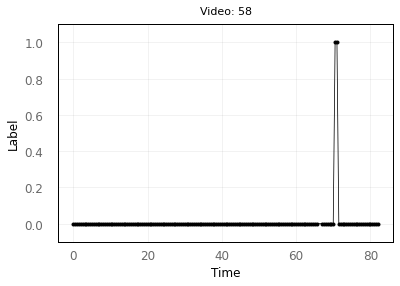

In [97]:
listed=(list(plot_df.groupby("label")))
for i in listed:
    fig = plt.figure()
    plt.plot(i[1].loc[:,'time'],i[1].loc[:,'pred'],marker = '.', color = "Black")
    plt.title("Video: "+str(i[0]))
    plt.xlabel("Time")
    plt.ylabel("Label")
    plt.ylim(-0.1,1.1)
    plt.show()
    json_save=i[1].iloc[:,1:2]
    # json_save.to_json('timeLabel: ' +str(i[0])+ ".json")
  

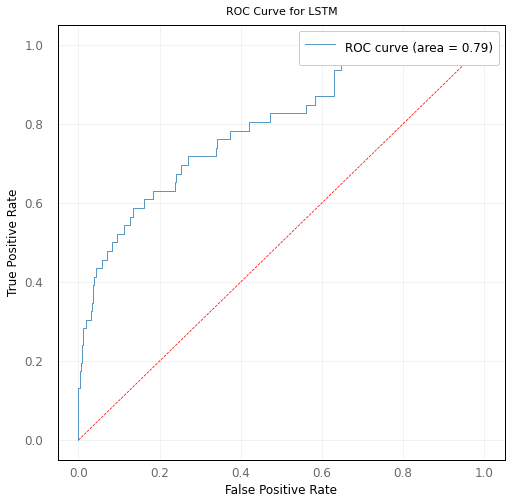

In [98]:
## Check ROC for the data
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1],'r--')
fpr, tpr, thresholds = roc_curve(y_shaped_test, y_score_10)
plt.plot(fpr, tpr, label= 'ROC curve (area = %0.2f)' % roc_10)
plt.title('ROC Curve for LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

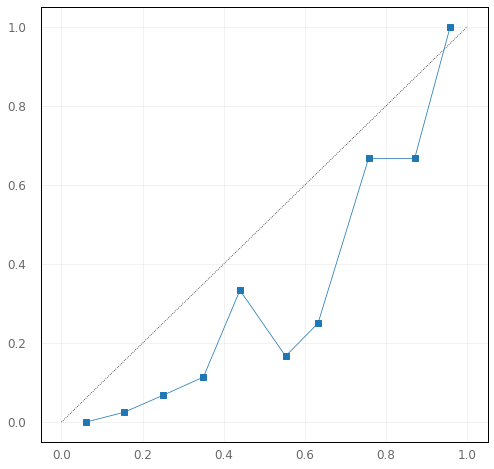

In [99]:
## Calibration curve
from sklearn.calibration import calibration_curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value=calibration_curve(y_shaped_test,y_score_10,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'LSTM')

In [119]:
# serialize weights to HDF5
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [155]:
model=load_model('model.h5')